# **Importing Libraries and Reading the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
hd = pd.read_csv('/content/heart_cleaned.csv')
hd.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2,thal_3
0,-0.256357,1,-0.371077,-0.701940,0,0.801255,0,-0.008573,2,0,False,False,False,True,False,False,True,False,True
1,-0.145641,1,0.484371,-0.892006,1,0.233473,1,1.907455,0,0,False,False,False,False,False,False,False,False,True
2,1.736541,1,0.769520,-1.504441,0,-1.076792,1,1.451258,0,0,False,False,False,True,False,False,False,False,True
3,0.740092,1,0.940610,-0.892006,0,0.495526,0,-0.920967,1,0,False,False,False,True,False,False,True,False,True
4,0.850808,0,0.370311,1.029772,1,-1.906626,0,0.812582,3,0,False,False,False,True,False,True,False,True,False


# **Apply PCA**

**Separate features (X) and target (y)**

In [ ]:
X = hd.drop("target", axis=1)
y = hd["target"]
print("Feature shape:",X.shape)
print("Target distribution:\n",y.value_counts())

Feature shape: (298, 18)
Target distribution:
 target
1    162
0    136
Name: count, dtype: int64


**Apply PCA without specifying number of components initially**

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)

**Explained variance**

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#**Visualize PCA Scatter Plot**

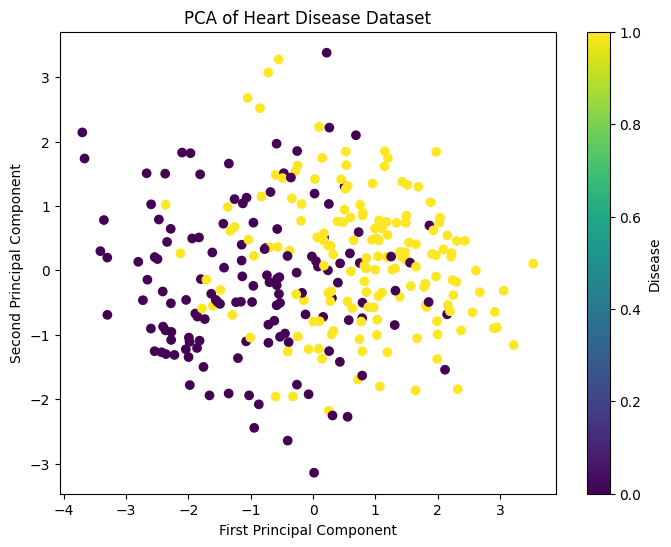

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Heart Disease Dataset')
plt.colorbar(label='Disease')
plt.show()

#**Scree Plot (Variance per Component)**

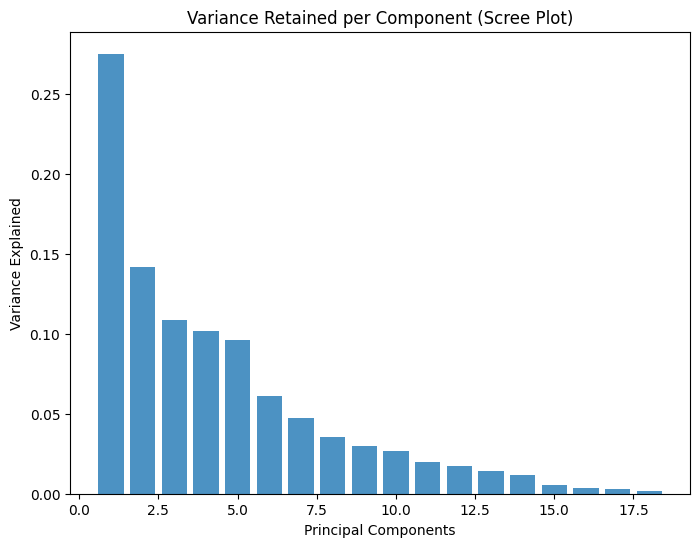

In [ ]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.8, align='center')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.title('Variance Retained per Component (Scree Plot)')
plt.show()

#**Cumulative Explained Variance**

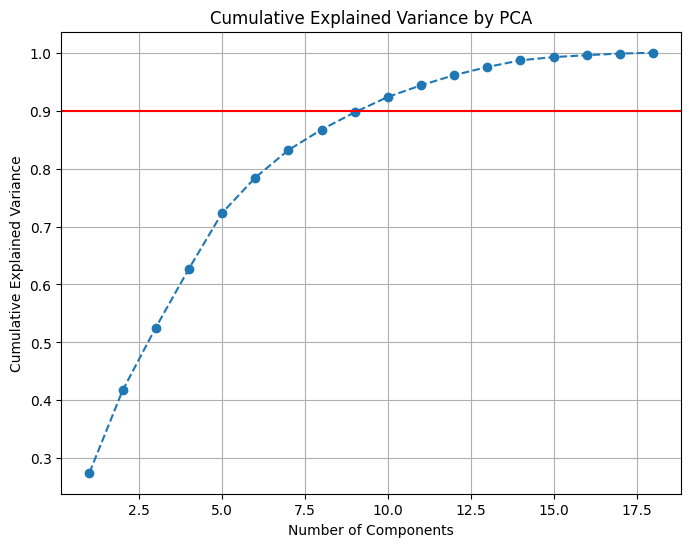

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()

#**Select Optimal Number of Components (90%)**

In [ ]:
pca = PCA(n_components=9)
X_reduced = pca.fit_transform(X)

#**Save PCA-transformed Dataset**

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Suppose you used k components
n_components = X_reduced.shape[1]
columns = [f"PC{i+1}" for i in range(n_components)]

df_pca = pd.DataFrame(X_reduced, columns=columns)
df_pca.to_csv("/content/drive/MyDrive/Heart Disease Risks Project/data/heart_disease_pca.csv", index=False)
